# Import functions & load data

In [ ]:
pip install -q -U keras-tuner

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras import metrics
from keras.models import Sequential
from tensorflow.keras.models import Model,load_model
from keras.layers import Input, Dense, Embedding, SimpleRNN, Dropout, concatenate, Lambda, BatchNormalization
#from keras.optimizers import Adam, SGD, RMSprop
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf 
import keras_tuner as kt
from sklearn.model_selection import train_test_split

from math import floor
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score,recall_score,roc_auc_score, make_scorer, f1_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
import pickle
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

from sklearn.feature_selection import chi2
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/X_train.csv')
X_test = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/X_test.csv')
y_train = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/BT4012/processed dataset/v4/y_test.csv')

In [ ]:
X_test.head()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending,customerBillingAddressRegion_Midwest,customerBillingAddressRegion_Multiple,customerBillingAddressRegion_Northeast,customerBillingAddressRegion_Others,customerBillingAddressRegion_South,customerBillingAddressRegion_West,ipCountry_Armenia,ipCountry_China,ipCountry_France,ipCountry_Hong Kong,ipCountry_Iran,ipCountry_Italy,ipCountry_Japan,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
0,0,0,0.492327,0,0.670533,0.672305,1.411767,-0.205480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,-0.252035,0,-0.090536,-0.000449,0.701246,-0.205480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0,1.466506,0,2.705394,2.794331,1.845678,4.866643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0.492327,1,1.690437,-0.487255,-1.159686,-0.205480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0,-1.295872,0,-0.090536,-0.000449,0.141112,-0.205480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# drop unnamed cols
X_train = X_train.drop(columns=['Unnamed: 0'])
X_test = X_test.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns=['Unnamed: 0'])
y_test = y_test.drop(columns=['Unnamed: 0'])

In [ ]:
X_train.head()

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_failed,orderState_fulfilled,orderState_pending,customerBillingAddressRegion_Midwest,customerBillingAddressRegion_Multiple,customerBillingAddressRegion_Northeast,customerBillingAddressRegion_Others,customerBillingAddressRegion_South,customerBillingAddressRegion_West,ipCountry_Armenia,ipCountry_China,ipCountry_France,ipCountry_Hong Kong,ipCountry_Iran,ipCountry_Italy,ipCountry_Japan,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
0,0,0.932356,0,0.670533,0.672305,1.411767,-0.20548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,-0.467713,0,-0.090536,-0.000449,0.141112,-0.20548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,-1.185160,0,-0.451419,-0.000449,-1.159686,-0.20548,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-1.295872,0,-0.451419,-0.487255,0.141112,-0.20548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1.737398,0,1.032315,1.140328,1.250301,-0.20548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#X_val, X_test, y_val, y_test = train_test_split(X_test ,y_test, test_size=0.5)

# Simple NN model

## Tuning the Hyperparameters

In [ ]:
def model_builder(hp):
  model = Sequential()
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 8-64
  hp_units = hp.Int('units', min_value=8, max_value=64, step=8)
  model.add(Dense(units=hp_units, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.05, 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[5e-2, 1e-2, 1e-3, 1e-4])

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy', metrics.Recall(), metrics.Precision(), metrics.AUC()])

  return model

In [ ]:
tuner = kt.BayesianOptimization(
    hypermodel=model_builder,
    objective=kt.Objective("recall", direction="max"),
    max_trials=10,
    alpha=0.0001,
    beta=2.6
)

In [ ]:
tuner.search(X_train, y_train, epochs=30)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 32 and the optimal learning rate for the optimizer
is 0.05.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 30 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=30)

loss_per_epoch = history.history['loss']
best_epoch = loss_per_epoch.index(min(loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/30
15/15 [==============================] - 1s 2ms/step - loss: 0.5648 - accuracy: 0.7399 - recall_11: 0.6021 - precision_11: 0.7143 - auc_11: 0.7728     
Epoch 2/30
15/15 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8550 - recall_11: 0.7487 - precision_11: 0.8773 - auc_11: 0.9091
Epoch 3/30
15/15 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8763 - recall_11: 0.7958 - precision_11: 0.8889 - auc_11: 0.9440
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9147 - recall_11: 0.8796 - precision_11: 0.9081 - auc_11: 0.9677
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 0.1734 - accuracy: 0.9275 - recall_11: 0.8848 - precision_11: 0.9337 - auc_11: 0.9837
Epoch 6/30
15/15 [==============================] - 0s 3ms/step - loss: 0.1198 - accuracy: 0.9552 - recall_11: 0.9267 - precision_11: 0.9620 - auc_11: 0.9937
Epoch 7/30
15/15 [=============================

In [ ]:
# Now, retrain model with the best num of epochs
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch)

Epoch 1/30
15/15 [==============================] - 1s 2ms/step - loss: 0.5305 - accuracy: 0.7484 - recall_12: 0.5969 - precision_12: 0.7355 - auc_12: 0.7813
Epoch 2/30
15/15 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8614 - recall_12: 0.7644 - precision_12: 0.8795 - auc_12: 0.9107
Epoch 3/30
15/15 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.8827 - recall_12: 0.8063 - precision_12: 0.8953 - auc_12: 0.9552
Epoch 4/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9232 - recall_12: 0.8691 - precision_12: 0.9379 - auc_12: 0.9793
Epoch 5/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9552 - recall_12: 0.9267 - precision_12: 0.9620 - auc_12: 0.9886
Epoch 6/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9680 - recall_12: 0.9634 - precision_12: 0.9583 - auc_12: 0.9955
Epoch 7/30
15/15 [==============================] - 

In [ ]:
eval_result = hypermodel.evaluate(X_train, y_train)
print('Train Loss: ', eval_result[0])
print('Train Accuracy: ', eval_result[1])
print('Train Recall: ', eval_result[2])
print('Train Precision: ', eval_result[3])
print('Train AUC: ', eval_result[4])
print('Train F1 Score: ', 2*(eval_result[3]*eval_result[2])/(eval_result[3]+eval_result[2]))

15/15 [==============================] - 1s 2ms/step - loss: 6.4228e-04 - accuracy: 1.0000 - recall_12: 1.0000 - precision_12: 1.0000 - auc_12: 1.0000
Train Loss:  0.0006422800943255424
Train Accuracy:  1.0
Train Recall:  1.0
Train Precision:  1.0
Train AUC:  1.0
Train F1 Score:  1.0


In [ ]:
eval_result = hypermodel.evaluate(X_test, y_test)
print('Test Loss: ', eval_result[0])
print('Test Accuracy: ', eval_result[1])
print('Test Recall: ', eval_result[2])
print('Test Precision: ', eval_result[3])
print('Test AUC: ', eval_result[4])
print('Test F1 Score: ', 2*(eval_result[3]*eval_result[2])/(eval_result[3]+eval_result[2]))

4/4 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9492 - recall_12: 0.9649 - precision_12: 0.9322 - auc_12: 0.9819
Test Loss:  0.23540082573890686
Test Accuracy:  0.9491525292396545
Test Recall:  0.9649122953414917
Test Precision:  0.9322034120559692
Test AUC:  0.9818810224533081
Test F1 Score:  0.9482758806378322


# Explainable AI using SHAP

SHAP is a method based on cooperative game theory that is used to increase transparency and interpretability of ML models. Unlike self-explaining models, SVM does not work off a Rule-based System that generates explanation at the same time as the prediction. Instead, additional operation is required to unpack and interpret the model

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 32.5 MB/s 


In [ ]:
# Fit the explainer
explainer = shap.Explainer(hypermodel.predict, X_test)

# Calculate the SHAP values
shap_values = explainer(X_test)

63/63 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 7/118 [00:00<?, ?it/s]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 9/118 [00:12<01:32,  1.17it/s]

54/54 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 10/118 [00:13<01:58,  1.10s/it]

51/51 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▉         | 11/118 [00:15<02:23,  1.35s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█         | 12/118 [00:17<02:28,  1.40s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█         | 13/118 [00:18<02:28,  1.41s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 14/118 [00:19<02:26,  1.41s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 15/118 [00:21<02:25,  1.41s/it]

58/58 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▎        | 16/118 [00:23<02:36,  1.53s/it]

72/72 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▍        | 17/118 [00:25<02:51,  1.69s/it]

61/61 [==============================] - 0s 1ms/step


Permutation explainer:  15%|█▌        | 18/118 [00:26<02:41,  1.62s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  16%|█▌        | 19/118 [00:28<02:34,  1.56s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  17%|█▋        | 20/118 [00:29<02:27,  1.50s/it]

70/70 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█▊        | 21/118 [00:31<02:25,  1.50s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▊        | 22/118 [00:32<02:25,  1.52s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▉        | 23/118 [00:34<02:22,  1.50s/it]

61/61 [==============================] - 0s 1ms/step


Permutation explainer:  20%|██        | 24/118 [00:35<02:18,  1.47s/it]

51/51 [==============================] - 0s 1ms/step


Permutation explainer:  21%|██        | 25/118 [00:36<02:16,  1.47s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██▏       | 26/118 [00:38<02:24,  1.57s/it]

52/52 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 27/118 [00:40<02:19,  1.53s/it]

58/58 [==============================] - 0s 1ms/step


Permutation explainer:  24%|██▎       | 28/118 [00:41<02:16,  1.52s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  25%|██▍       | 29/118 [00:43<02:13,  1.50s/it]

51/51 [==============================] - 0s 1ms/step


Permutation explainer:  25%|██▌       | 30/118 [00:44<02:10,  1.48s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▋       | 31/118 [00:45<02:07,  1.47s/it]

56/56 [==============================] - 0s 1ms/step


Permutation explainer:  27%|██▋       | 32/118 [00:47<02:05,  1.45s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  28%|██▊       | 33/118 [00:48<02:01,  1.42s/it]

61/61 [==============================] - 0s 1ms/step


Permutation explainer:  29%|██▉       | 34/118 [00:50<01:59,  1.42s/it]

50/50 [==============================] - 0s 1ms/step


Permutation explainer:  30%|██▉       | 35/118 [00:51<01:57,  1.41s/it]

56/56 [==============================] - 0s 1ms/step


Permutation explainer:  31%|███       | 36/118 [00:52<01:54,  1.39s/it]

50/50 [==============================] - 0s 1ms/step


Permutation explainer:  31%|███▏      | 37/118 [00:54<01:50,  1.37s/it]

56/56 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 38/118 [00:55<01:51,  1.39s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  33%|███▎      | 39/118 [00:57<01:53,  1.43s/it]

53/53 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 40/118 [00:58<01:50,  1.42s/it]

59/59 [==============================] - 0s 1ms/step


Permutation explainer:  35%|███▍      | 41/118 [01:00<02:07,  1.66s/it]

54/54 [==============================] - 0s 1ms/step


Permutation explainer:  36%|███▌      | 42/118 [01:03<02:37,  2.08s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  36%|███▋      | 43/118 [01:05<02:23,  1.91s/it]

50/50 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 44/118 [01:06<02:10,  1.77s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 45/118 [01:08<02:02,  1.68s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  39%|███▉      | 46/118 [01:09<01:56,  1.62s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  40%|███▉      | 47/118 [01:12<02:10,  1.83s/it]

55/55 [==============================] - 0s 1ms/step


Permutation explainer:  41%|████      | 48/118 [01:13<02:01,  1.74s/it]

49/49 [==============================] - 0s 1ms/step


Permutation explainer:  42%|████▏     | 49/118 [01:15<01:53,  1.64s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  42%|████▏     | 50/118 [01:16<01:48,  1.60s/it]

66/66 [==============================] - 0s 1ms/step


Permutation explainer:  43%|████▎     | 51/118 [01:18<01:46,  1.59s/it]

50/50 [==============================] - 0s 1ms/step


Permutation explainer:  44%|████▍     | 52/118 [01:19<01:43,  1.57s/it]

58/58 [==============================] - 0s 1ms/step


Permutation explainer:  45%|████▍     | 53/118 [01:21<01:39,  1.53s/it]

65/65 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 54/118 [01:22<01:37,  1.52s/it]

54/54 [==============================] - 0s 1ms/step


Permutation explainer:  47%|████▋     | 55/118 [01:23<01:34,  1.49s/it]

54/54 [==============================] - 0s 1ms/step


Permutation explainer:  47%|████▋     | 56/118 [01:25<01:31,  1.47s/it]

55/55 [==============================] - 0s 1ms/step


Permutation explainer:  48%|████▊     | 57/118 [01:26<01:27,  1.43s/it]

58/58 [==============================] - 0s 1ms/step


Permutation explainer:  49%|████▉     | 58/118 [01:28<01:26,  1.45s/it]

52/52 [==============================] - 0s 1ms/step


Permutation explainer:  50%|█████     | 59/118 [01:29<01:23,  1.42s/it]

52/52 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 60/118 [01:30<01:20,  1.40s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  52%|█████▏    | 61/118 [01:32<01:20,  1.41s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  53%|█████▎    | 62/118 [01:33<01:19,  1.42s/it]

59/59 [==============================] - 0s 1ms/step


Permutation explainer:  53%|█████▎    | 63/118 [01:35<01:17,  1.41s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  54%|█████▍    | 64/118 [01:36<01:17,  1.43s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  55%|█████▌    | 65/118 [01:38<01:16,  1.45s/it]

52/52 [==============================] - 0s 1ms/step


Permutation explainer:  56%|█████▌    | 66/118 [01:39<01:14,  1.44s/it]

75/75 [==============================] - 0s 1ms/step


Permutation explainer:  57%|█████▋    | 67/118 [01:41<01:17,  1.52s/it]

53/53 [==============================] - 0s 1ms/step


Permutation explainer:  58%|█████▊    | 68/118 [01:42<01:13,  1.47s/it]

70/70 [==============================] - 0s 1ms/step


Permutation explainer:  58%|█████▊    | 69/118 [01:44<01:18,  1.60s/it]

66/66 [==============================] - 0s 1ms/step


Permutation explainer:  59%|█████▉    | 70/118 [01:46<01:15,  1.57s/it]

56/56 [==============================] - 0s 1ms/step


Permutation explainer:  60%|██████    | 71/118 [01:47<01:12,  1.55s/it]

55/55 [==============================] - 0s 1ms/step


Permutation explainer:  61%|██████    | 72/118 [01:48<01:08,  1.50s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  62%|██████▏   | 73/118 [01:50<01:07,  1.49s/it]

53/53 [==============================] - 0s 1ms/step


Permutation explainer:  63%|██████▎   | 74/118 [01:51<01:03,  1.45s/it]

51/51 [==============================] - 0s 1ms/step


Permutation explainer:  64%|██████▎   | 75/118 [01:53<01:02,  1.46s/it]

70/70 [==============================] - 0s 1ms/step


Permutation explainer:  64%|██████▍   | 76/118 [01:54<01:04,  1.54s/it]

54/54 [==============================] - 0s 1ms/step


Permutation explainer:  65%|██████▌   | 77/118 [01:56<01:01,  1.50s/it]

53/53 [==============================] - 0s 1ms/step


Permutation explainer:  66%|██████▌   | 78/118 [01:57<01:00,  1.51s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  67%|██████▋   | 79/118 [01:59<00:58,  1.49s/it]

74/74 [==============================] - 0s 1ms/step


Permutation explainer:  68%|██████▊   | 80/118 [02:00<00:57,  1.52s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  69%|██████▊   | 81/118 [02:02<00:54,  1.48s/it]

52/52 [==============================] - 0s 1ms/step


Permutation explainer:  69%|██████▉   | 82/118 [02:03<00:52,  1.45s/it]

53/53 [==============================] - 0s 1ms/step


Permutation explainer:  70%|███████   | 83/118 [02:05<00:50,  1.45s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  71%|███████   | 84/118 [02:06<00:50,  1.47s/it]

59/59 [==============================] - 0s 1ms/step


Permutation explainer:  72%|███████▏  | 85/118 [02:08<00:48,  1.48s/it]

46/46 [==============================] - 0s 1ms/step


Permutation explainer:  73%|███████▎  | 86/118 [02:09<00:46,  1.46s/it]

70/70 [==============================] - 0s 1ms/step


Permutation explainer:  74%|███████▎  | 87/118 [02:11<00:45,  1.47s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  75%|███████▍  | 88/118 [02:12<00:44,  1.48s/it]

56/56 [==============================] - 0s 1ms/step


Permutation explainer:  75%|███████▌  | 89/118 [02:14<00:42,  1.47s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  76%|███████▋  | 90/118 [02:15<00:41,  1.48s/it]

61/61 [==============================] - 0s 1ms/step


Permutation explainer:  77%|███████▋  | 91/118 [02:17<00:44,  1.64s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  78%|███████▊  | 92/118 [02:19<00:45,  1.73s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  79%|███████▉  | 93/118 [02:20<00:41,  1.66s/it]

58/58 [==============================] - 0s 1ms/step


Permutation explainer:  80%|███████▉  | 94/118 [02:22<00:38,  1.60s/it]

58/58 [==============================] - 0s 1ms/step


Permutation explainer:  81%|████████  | 95/118 [02:23<00:35,  1.54s/it]

68/68 [==============================] - 0s 1ms/step


Permutation explainer:  81%|████████▏ | 96/118 [02:25<00:34,  1.55s/it]

56/56 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 97/118 [02:26<00:31,  1.52s/it]

52/52 [==============================] - 0s 1ms/step


Permutation explainer:  83%|████████▎ | 98/118 [02:28<00:29,  1.47s/it]

73/73 [==============================] - 0s 1ms/step


Permutation explainer:  84%|████████▍ | 99/118 [02:29<00:28,  1.49s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  85%|████████▍ | 100/118 [02:31<00:26,  1.47s/it]

54/54 [==============================] - 0s 1ms/step


Permutation explainer:  86%|████████▌ | 101/118 [02:32<00:24,  1.47s/it]

55/55 [==============================] - 0s 1ms/step


Permutation explainer:  86%|████████▋ | 102/118 [02:34<00:23,  1.49s/it]

64/64 [==============================] - 0s 1ms/step


Permutation explainer:  87%|████████▋ | 103/118 [02:35<00:22,  1.49s/it]

58/58 [==============================] - 0s 1ms/step


Permutation explainer:  88%|████████▊ | 104/118 [02:37<00:20,  1.47s/it]

59/59 [==============================] - 0s 1ms/step


Permutation explainer:  89%|████████▉ | 105/118 [02:38<00:19,  1.48s/it]

62/62 [==============================] - 0s 1ms/step


Permutation explainer:  90%|████████▉ | 106/118 [02:40<00:17,  1.48s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  91%|█████████ | 107/118 [02:41<00:16,  1.48s/it]

58/58 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 108/118 [02:42<00:14,  1.46s/it]

59/59 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 109/118 [02:44<00:13,  1.48s/it]

60/60 [==============================] - 0s 1ms/step


Permutation explainer:  93%|█████████▎| 110/118 [02:46<00:11,  1.49s/it]

49/49 [==============================] - 0s 1ms/step


Permutation explainer:  94%|█████████▍| 111/118 [02:47<00:10,  1.47s/it]

65/65 [==============================] - 0s 1ms/step


Permutation explainer:  95%|█████████▍| 112/118 [02:48<00:08,  1.49s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  96%|█████████▌| 113/118 [02:50<00:07,  1.45s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer:  97%|█████████▋| 114/118 [02:51<00:05,  1.47s/it]

51/51 [==============================] - 0s 1ms/step


Permutation explainer:  97%|█████████▋| 115/118 [02:53<00:04,  1.41s/it]

57/57 [==============================] - 0s 1ms/step


Permutation explainer:  98%|█████████▊| 116/118 [02:54<00:02,  1.43s/it]

56/56 [==============================] - 0s 1ms/step


Permutation explainer:  99%|█████████▉| 117/118 [02:56<00:01,  1.45s/it]

61/61 [==============================] - 0s 1ms/step


Permutation explainer: 100%|██████████| 118/118 [02:57<00:00,  1.47s/it]

63/63 [==============================] - 0s 1ms/step


Permutation explainer: 119it [02:59,  1.60s/it]


## SHAP: Barplot

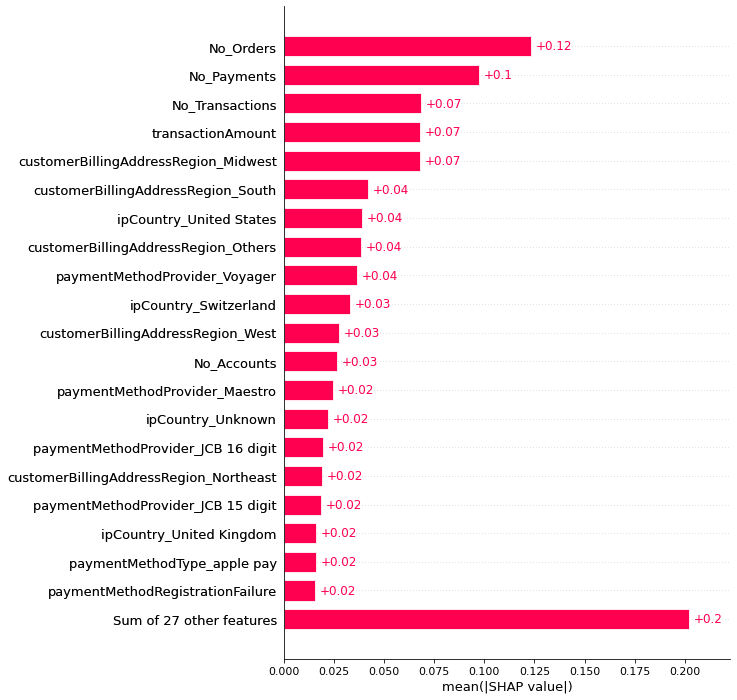

In [ ]:
shap.plots.bar(shap_values, max_display = 21)

## SHAP: Beeswarm plot

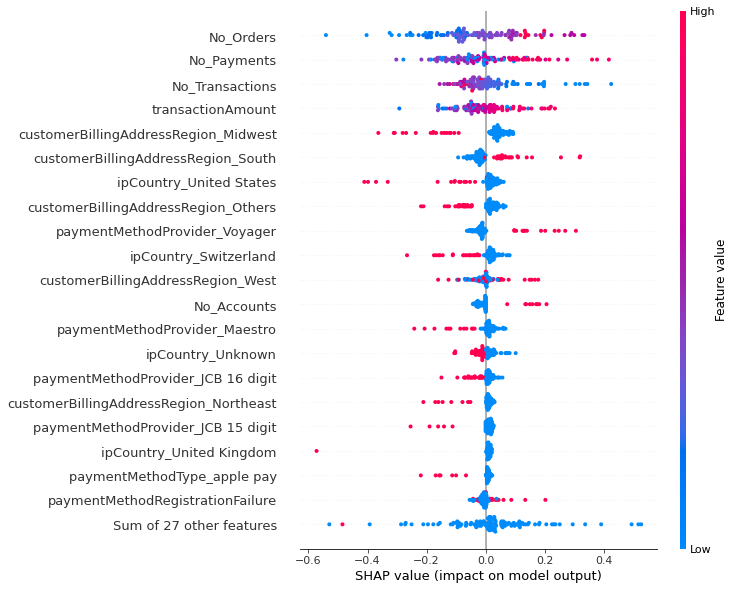

In [ ]:
shap.plots.beeswarm(shap_values, max_display = 21)